# Conserved Quantities

A *set of states* is a finite set $S$ with the base state $\ast \in S$, and an *interaction* on $S$ is a map $\phi: S \times S \to S \times S$ which satisfies that
$$
    \hat{\iota}(\phi(\hat{\iota}(\phi(s_1, s_2)))) = (s_1, s_2)
$$
where $\hat{\iota}(s_1, s_2) := (s_2, s_1)$ for any $s_1, s_2 \in S$ such that $\phi(s_1, s_2) \neq (s_1, s_2)$.
Fixing a set $S$ of states with the base state $\ast$ and an interaction $\phi$ on $S$, we say that a map $\xi: S \to \mathbb{R}$ is a *conserved quantity* if $\xi$ satisfies that
$$
    \xi(\ast) = 0
$$
and
$$
    \xi(s_1) + \xi(s_2) = \xi(s'_1) + \xi(s'_2)
$$
where $s_1, s_2 \in S$ and $(s'_1, s'_2) := \phi(s_1, s_2)$.
The space of all conserved quantities is denoted by $\mathrm{Consv}^\phi(S) \subseteq \mathrm{Hom}(S, \mathbb{R})$, which becomes a vector space over $\mathbb{R}$ of finite dimension.

The module `ConservedQuantities` provides the API for calculating a basis of the space $\mathrm{Consv}^\phi(S)$ of conserved quantities for a given interaction $\phi$ on some set $S$ of states.

In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\User\LargeScaleInteractingSystems`


#### Required:
- [`Nemo` v0.32.3](https://nemocas.github.io/Nemo.jl/stable/)
- [`Plots` v1.29.0](https://docs.juliaplots.org/latest/tutorial/)
- [`Graphs` v1.7.4](https://juliagraphs.org/Graphs.jl/dev/)
- [`TikzGraph` v1.4.0](https://nbviewer.org/github/JuliaTeX/TikzGraphs.jl/blob/master/doc/TikzGraphs.ipynb)
- [`LaTeXStrings` v1.3.0](https://github.com/stevengj/LaTeXStrings.jl)

In [2]:
# include("RequiredPackages.jl")

In [32]:
# using modules
using LargeScaleInteractingSystems.States:
    StateSet
using LargeScaleInteractingSystems.Interactions:
    Interaction,
    interaction_plot,
    multi_color_exclusion_interaction,
    generalized_exclusion_interaction,
    lattice_gas_interaction,
    spin_interaction,
    glauber_model_interaction
using LargeScaleInteractingSystems.ConservedQuantities:
    conserved_quantities

using Nemo

## Example 1: Multi-Color Exclusion Processes
The first example for interactions is the *multi-color exclusion process* on the set $S := \{\ast = 0, 1, \dots, \kappa\}$ of states where $\kappa \in \Z_{>0}$ is the number of colors of particles.
That a cell is the state $\ast \in S$ represents that there is no particle, and the state $i \in \{1, \dots, \kappa\}$ represents that there is exact one particle of color $i$.
The interaction $\phi: S \times S \to S \times S$ is defined by
$$
    \phi(s_1, s_2) := (s_2, s_1)
$$
which moves a particle into the vacated cell or exchanges particles in the two occupied cells.

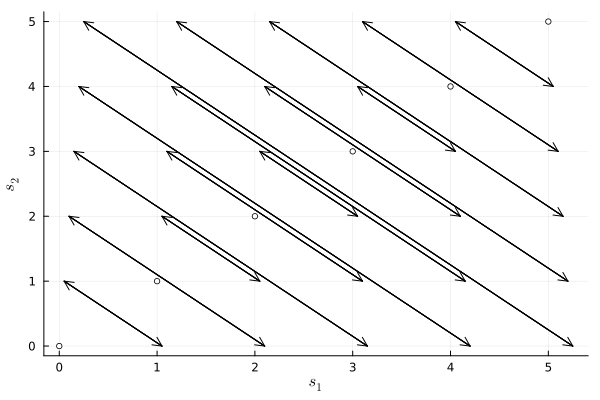

In [4]:
# example 1: multi-color exclusion process
color_num = 5
intr = multi_color_exclusion_interaction(color_num)

# plot interaction
interaction_plot(intr #= , mode = :coord =# )

`interaction_plot` plots the interaction $\phi$ on the set $S$ of states.
- `mode = :coord` (default) shows plots on the xy-plane, and
- `mode = :graph` shows plots as a graph with nodes which are not aligned but avoid collisions of edges.

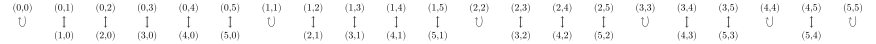

In [5]:
# graph style plot
interaction_plot(intr, :graph)

For the multi-color exclusion process any map $\xi: S \to \mathbb{R}$ which maps $0 = \ast \in S$ to $0 \in \mathbb{R}$ gets to be a conserved quantity since $\xi(s_1) + \xi(s_2) = \xi(s_2) + \xi(s_1)$.
Thus the space $\mathrm{Consv}^\phi(S)$ of conserved quantities coincides with the space $\mathrm{Hom}(S \setminus \{\ast\}, \mathbb{R}) \cong \mathbb{R}^{\#S - 1}$ of all maps $\xi: S \to \mathbb{R}$ with $\xi(\ast) = 0$.
In particular the map $\xi_i: s \mapsto \begin{cases} 1 & s = i \\ 0 & s \neq i \end{cases}$ for $i \in \{1, \dots, \kappa\}$ is a conserved quantity which means that the number of particles of color $i$ is conserved while the process evolves.

`conserved_quantities` calculates the kernel matrix of the relations $\xi(s_1) + \xi(s_2) - \xi(s'_1) - \xi(s'_2) = 0$ in $\mathrm{Hom}(S \setminus \{\ast\}, \mathbb{R})$ for $s_1, s_2 \in S$ and $(s'_1, s'_2) := \phi(s_1, s_2)$, whose columns are values of the conserved quantities $\xi_i$ at non-base states in $S$, which form a basis of $\mathrm{Consv}^\phi(S)$.
In this case, the basis of $\mathrm{Consv}^\phi(S)$ consists of the "number of particle of color $i$" maps $\xi_i$ for $i \in \{1, \dots, \kappa\}$.

In [6]:
sys = conserved_quantities(intr)

sys

# =>
# [1   0   0   0   0]
# [0   1   0   0   0]
# [0   0   1   0   0]
# [0   0   0   1   0]
# [0   0   0   0   1]

# each columns gives the conserved quantities ξ_i; i -> 1, j (!= 1) -> 0

[1   0   0   0   0]
[0   1   0   0   0]
[0   0   1   0   0]
[0   0   0   1   0]
[0   0   0   0   1]

## Example 2: Generalized Exclusion Processes
Next we consider the *generalized exclusion process* on the set $S := \{\ast = 0, 1, \dots, \kappa\}$ of states where $\kappa \in \Z_{>0}$ is the number of particles.
That a cell is the state $\ast \in S$ represents that there is no particle, and the state $i \in \{1, \dots, \kappa\}$ represents that there are exact $i$ particles in the cell.
The interaction $\phi: S \times S \to S \times S$ is defined by
$$
    \phi(s_1, s_2) := \begin{cases}
        (s_1 - 1, s_2 + 1) & s_1 - 1, s_2 + 1 \in S \\
        (s_1, s_2) & \text{otherwise}
    \end{cases}
$$
which moves a particle from the nonempty cell to the adjacent cell while the cell is not full.

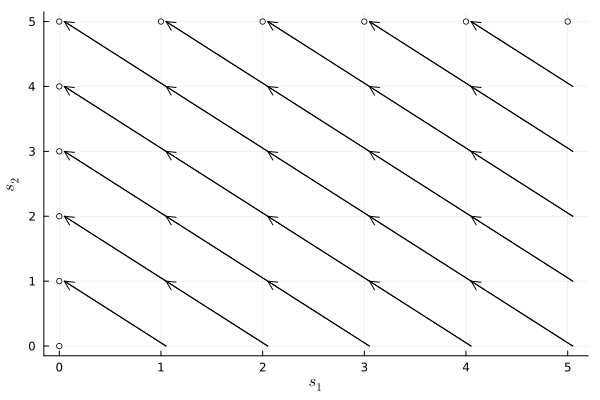

In [7]:
# example 2: generalized exclusion process
max_num = 5
intr = generalized_exclusion_interaction(max_num)

# plot interaction
interaction_plot(intr)

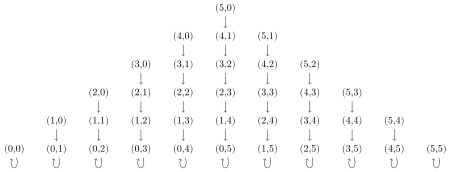

In [8]:
# graph style plot
interaction_plot(intr, :graph)

The conserved quantities for the generalized exclusion process are generated by the map $\xi: S \to \mathbb{R}$ which counts the number of particles in the cell, i.e. $\xi(s) = s$.

In [9]:
sys = conserved_quantities(intr)

sys
# =>
# [1]
# [2]
# [3]
# [4]
# [5]
# the generator ξ maps i -> i

[1]
[2]
[3]
[4]
[5]

## Example 3: Interactions of Lattice Gas 
The *lattice gas* is a model of a gas of particles on a lattice, where particles have energy, and interact with each other by receiving energy or move to a vacant cell.
The set of states is given by $S := \{\ast = 0, 1, \dots, \kappa\}$ where $\kappa$ is the maximum energy of a particle.
The interaction $\phi: S \times S \to S \times S$ is the energy-receiving map
$$
    \phi(s_1, s_2) := \begin{cases}
        (s_2, s_1) & s_1 = \ast \\
        (s_1 - 1, s_2 + 1) & s_1 - 1, s_2 + 1 \in S \setminus \{ \ast \} \\
        (s_1, s_2) & \text{otherwise}
    \end{cases}.
$$

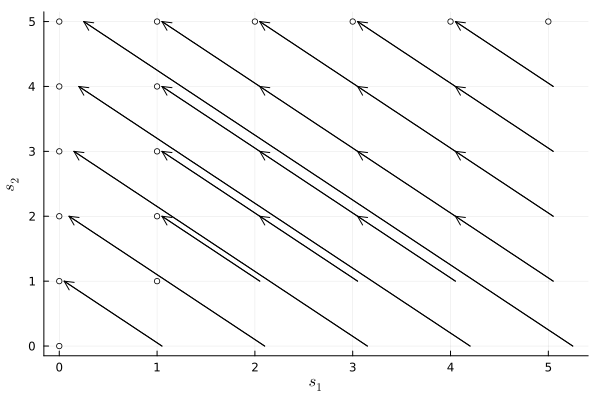

In [24]:
# example 3: interactions of lattice gas
max_energy = 5
intr = lattice_gas_interaction(max_energy)

# plot interaction
interaction_plot(intr)

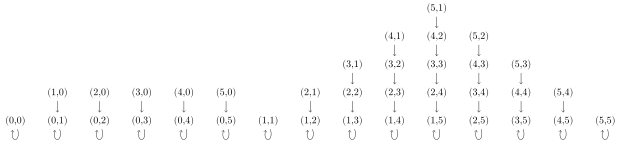

In [25]:
# graph style plot
interaction_plot(intr, :graph)

There are two conserved quantities for the lattice gas interaction: the number of particles $\xi_1(s) = \begin{cases} 0 & s = 0 \\ 1 & \text{otherwise} \end{cases}$ and the total energy $\xi_2(s) = s$.
In fact the space $\mathrm{Consv}^\phi(S)$ of conserved quantities generated by the two conserved quantities $\xi_1$ and $\xi_2$.

In [30]:
sys = conserved_quantities(intr)

sys

# =>
# [ 1   0]
# [ 0   1]
# [-1   2]
# [-2   3]
# [-3   4]

[ 1   0]
[ 0   1]
[-1   2]
[-2   3]
[-3   4]

In [31]:
# transforming the result we have two conserved quantities ξ_1: s -> (s>0) and ξ_2: s -> s
sys * ZZ[1 1; 1 2]

[1   1]
[1   2]
[1   3]
[1   4]
[1   5]

## Example 4: The Spin Model
The process with the set $S := \{-1, 0=\ast, 1\}$ of states and the *spin* interaction 
$$
    \phi(s_1, s_2) := \begin{cases}
        (-1, 1) & (s_1, s_2) = (0, 0) \\
        (1, -1) & (s_1, s_2) = (-1, 1) \\
        (0, 0)  & (s_1, s_2) = (0, 0) \\
        (s_2, s_1) & \text{otherwise}
    \end{cases}
$$
represents the spin system.

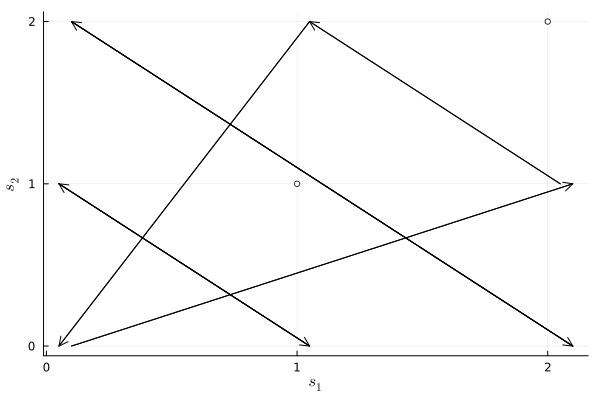

In [14]:
# example 1: multi-color exclusion process
intr = spin_interaction()

# plot interaction
interaction_plot(intr #= , mode = :coord =# )

# the set of states is only allowed to be {0, 1, 2} not {-1, 0, 1} in our implementation

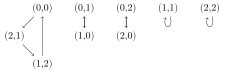

In [15]:
# graph style plot
interaction_plot(intr, :graph)

The conserved quantity for the spin interaction is generated by the total spin $\xi(s) = s$.

In [16]:
sys = conserved_quantities(intr)

sys
# =>
# [ 1]
# [-1]

[ 1]
[-1]

## Example 5: The Glauber Model
The *Glauber model* is a model with the set $S := \{0=\ast, 1\}$ of states and the interaction
$$
    \phi(s_1, s_2) := \begin{cases}
        (1, s_2) & s_1 = 0 \\
        (0, s_2) & s_1 = 1
    \end{cases}.
$$
Though this interaction does not satisfy the law $\hat{\iota}(\phi(\hat{\iota}(\phi(s_1, s_2)))) = (s_1, s_2)$ for all $s_1, s_2 \in S$ with $\phi(s_1, s_2) \neq (s_1, s_2)$, the concept of conserved quantities is still applicable (since composing $\hat{\iota}$ with $\phi$ does not change the class of conserved quantities).

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_positio

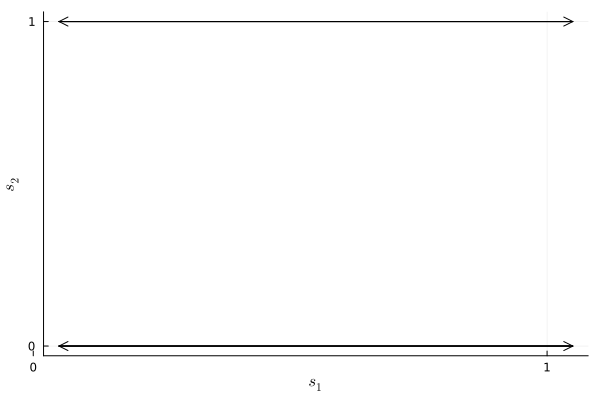

In [17]:
# example 5: the glauber model
intr = glauber_model_interaction()

# plot interaction
interaction_plot(intr #= , mode = :coord =# )

# TODO: some warning occurs

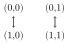

In [18]:
# graph style plot
interaction_plot(intr, :graph)

We have there is the only conserved quantity $\xi(s) = 0$ for the Glauber model because $\xi(1) = \xi(1) + \xi(0) = \xi(0) + \xi(0) = 0$.
Thus the space $\mathrm{Consv}^\phi(S)$ is zero.

In [19]:
sys = conserved_quantities(intr)

sys

# =>
# 1 by 0 empty matrix

1 by 0 empty matrix

# User-defined interactions

We can also define a new interaction and calculate the conserved quantities.

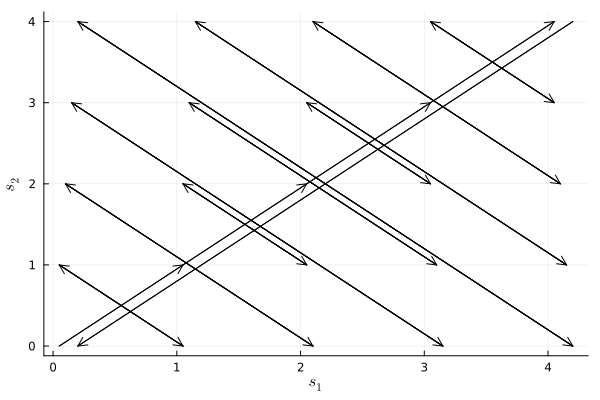

In [33]:
# define a new interaction
state_size = 5
state_set = StateSet(state_size) # the set {0, 1, 2, 3, 4} of states
my_intr = Interaction(state_set, (s, t) ->
    # write the interaction rule
    if s == t && s < state_size - 1
        (s+1, t+1)
    elseif s == t && s == state_size - 1
        (0, 0)
    else
        (t, s)
    end
)

# plot interaction
interaction_plot(my_intr)

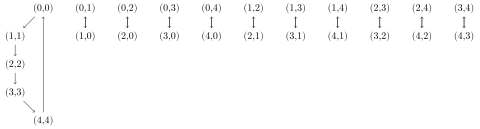

In [34]:
# graph style plot
interaction_plot(my_intr, :graph)

In [35]:
sys = conserved_quantities(my_intr)

sys
# =>
# 4 by 0 empty matrix

4 by 0 empty matrix

## References

[1] [Bannai, Kenichi and Kametani, Yukio and Sasada, Makiko. Topological Structures of Large Scale Interacting Systems via Uniform Functions and Forms. 2020.](https://arxiv.org/abs/2009.04699v4)